In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
#from keras.optimizers import RMSprop, adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Movie Data/Dataset Processing.csv')

In [ ]:
X = df.text
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
max_words = 20000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def Bi_LSTM():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(64))(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
def Bi_LSTM_2l():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(128,dropout =0.4, recurrent_dropout = 0.5, return_sequences=True), input_shape=(5, 10))(layer)
    layer = Bidirectional(LSTM(64))(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = Bi_LSTM()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               58880     
_________________________________________________________________
out_layer (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,059,009
Trainable params: 1,059,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = Bi_LSTM_2l()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           1000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 150, 256)          183296    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
out_layer (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 1,347,777
Trainable params: 1,347,777
Non-trainable params: 0
_________________________________________________

In [ ]:
his1 = model.fit(sequences_matrix,Y_train,batch_size=100,epochs=2,
          validation_split=0.5,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/2
225/225 [==============================] - 8s 35ms/step - loss: 0.4159 - accuracy: 0.8016 - val_loss: 0.2925 - val_accuracy: 0.8793
Epoch 2/2
225/225 [==============================] - 7s 32ms/step - loss: 0.1868 - accuracy: 0.9324 - val_loss: 0.3220 - val_accuracy: 0.8780


In [ ]:
his2 = model2.fit(sequences_matrix,Y_train,batch_size=100,epochs=2,
          validation_split=0.5,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/2
225/225 [==============================] - 131s 582ms/step - loss: 0.4125 - accuracy: 0.7999 - val_loss: 0.3045 - val_accuracy: 0.8716
Epoch 2/2
225/225 [==============================] - 130s 576ms/step - loss: 0.2050 - accuracy: 0.9242 - val_loss: 0.3029 - val_accuracy: 0.8776


In [ ]:
tokenized_word_list_test = tok.texts_to_sequences(X_test)
X_test_padded = sequence.pad_sequences(tokenized_word_list_test, maxlen = max_len, padding = 'post')

In [ ]:
score, acc = model.evaluate(X_test_padded, Y_test)
print('The accuracy of the model on the test set is ', acc*100)
y_pred = model.predict(X_test_padded)

157/157 [==============================] - 1s 8ms/step - loss: 0.6504 - accuracy: 0.6209
The accuracy of the model on the test set is  62.08758354187012


In [ ]:
score, acc = model2.evaluate(X_test_padded, Y_test)
print('The accuracy of the model on the test set is ', acc*100)
y_pred1 = model2.predict(X_test_padded)

157/157 [==============================] - 14s 86ms/step - loss: 0.4811 - accuracy: 0.8358
The accuracy of the model on the test set is  83.58328342437744


In [ ]:
class_id = (y_pred > 0.5)
cl = class_id.astype(int)
class_id1 = (y_pred1 > 0.5)
cl1 = class_id1.astype(int)

In [ ]:
print(classification_report(Y_test,cl))
print(confusion_matrix(Y_test,cl))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      2490
           1       0.86      0.29      0.44      2511

    accuracy                           0.62      5001
   macro avg       0.72      0.62      0.58      5001
weighted avg       0.72      0.62      0.57      5001

[[2372  118]
 [1778  733]]


In [ ]:
print(classification_report(Y_test,cl1))
print(confusion_matrix(Y_test,cl1))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      2490
           1       0.86      0.29      0.44      2511

    accuracy                           0.62      5001
   macro avg       0.72      0.62      0.58      5001
weighted avg       0.72      0.62      0.57      5001

[[2372  118]
 [1778  733]]


In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

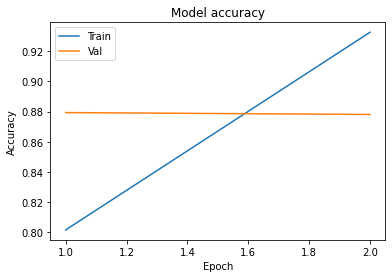

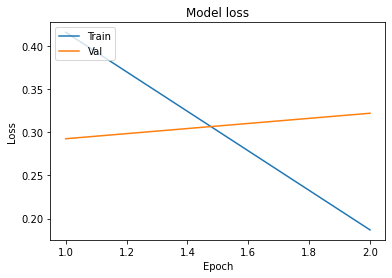

In [ ]:
plot_learningCurve(his1, 2)

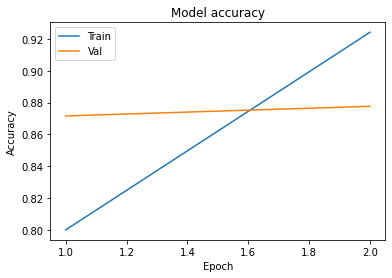

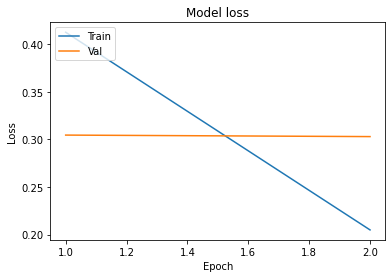

In [ ]:
plot_learningCurve(his2, 2)